In [11]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import warnings
import torch
import random
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

warnings.filterwarnings('ignore')

random.seed(42)
np.random.seed(42)
torch.manual_seed(42)

In [12]:
fashion_df = pd.read_csv("../data/cleaned_data/fashion_dataset.csv")
fashion_df.reset_index()

,index,image_name,x_1,y_1,x_2,y_2,width,height,area,category_id,category_name,category_type,category_type_name,eval_status,positive_attributes,absolute_path,num_attributes
0,0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,72,79,232,273,160,194,31040,3,Blouse,1,upper-body,train,"[717, 818]",../data/img/Sheer_Pleated-Front_Blouse/img_000...,2
1,1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,67,59,155,161,88,102,8976,3,Blouse,1,upper-body,train,"[717, 818]",../data/img/Sheer_Pleated-Front_Blouse/img_000...,2
2,2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,65,65,156,200,91,135,12285,3,Blouse,1,upper-body,val,"[141, 717, 837, 956]",../data/img/Sheer_Pleated-Front_Blouse/img_000...,4
3,3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,51,62,167,182,116,120,13920,3,Blouse,1,upper-body,train,[716],../data/img/Sheer_Pleated-Front_Blouse/img_000...,1
4,4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,46,88,166,262,120,174,20880,3,Blouse,1,upper-body,test,"[349, 405, 717, 810]",../data/img/Sheer_Pleated-Front_Blouse/img_000...,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289217,289217,img/Paisley_Print_Babydoll_Dress/img_00000050.jpg,1,1,300,300,299,299,89401,41,Dress,3,full-body,train,"[30, 681, 682, 730]",../data/img/Paisley_Print_Babydoll_Dress/img_0...,4
289218,289218,img/Paisley_Print_Babydoll_Dress/img_00000051.jpg,14,58,225,277,211,219,46209,41,Dress,3,full-body,train,"[275, 681]",../data/img/Paisley_Print_Babydoll_Dress/img_0...,2
289219,289219,img/Paisley_Print_Babydoll_Dress/img_00000052.jpg,18,41,149,230,131,189,24759,41,Dress,3,full-body,train,"[30, 681]",../data/img/Paisley_Print_Babydoll_Dress/img_0...,2
289220,289220,img/Paisley_Print_Babydoll_Dress/img_00000053.jpg,75,47,220,300,145,253,36685,41,Dress,3,full-body,train,"[30, 681, 682, 730]",../data/img/Paisley_Print_Babydoll_Dress/img_0...,4


In [13]:
fashion_df.head()

,image_name,x_1,y_1,x_2,y_2,width,height,area,category_id,category_name,category_type,category_type_name,eval_status,positive_attributes,absolute_path,num_attributes
0,img/Sheer_Pleated-Front_Blouse/img_00000001.jpg,72,79,232,273,160,194,31040,3,Blouse,1,upper-body,train,"[717, 818]",../data/img/Sheer_Pleated-Front_Blouse/img_000...,2
1,img/Sheer_Pleated-Front_Blouse/img_00000002.jpg,67,59,155,161,88,102,8976,3,Blouse,1,upper-body,train,"[717, 818]",../data/img/Sheer_Pleated-Front_Blouse/img_000...,2
2,img/Sheer_Pleated-Front_Blouse/img_00000003.jpg,65,65,156,200,91,135,12285,3,Blouse,1,upper-body,val,"[141, 717, 837, 956]",../data/img/Sheer_Pleated-Front_Blouse/img_000...,4
3,img/Sheer_Pleated-Front_Blouse/img_00000004.jpg,51,62,167,182,116,120,13920,3,Blouse,1,upper-body,train,[716],../data/img/Sheer_Pleated-Front_Blouse/img_000...,1
4,img/Sheer_Pleated-Front_Blouse/img_00000005.jpg,46,88,166,262,120,174,20880,3,Blouse,1,upper-body,test,"[349, 405, 717, 810]",../data/img/Sheer_Pleated-Front_Blouse/img_000...,4


In [14]:
fashion_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289222 entries, 0 to 289221
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_name           289222 non-null  object
 1   x_1                  289222 non-null  int64 
 2   y_1                  289222 non-null  int64 
 3   x_2                  289222 non-null  int64 
 4   y_2                  289222 non-null  int64 
 5   width                289222 non-null  int64 
 6   height               289222 non-null  int64 
 7   area                 289222 non-null  int64 
 8   category_id          289222 non-null  int64 
 9   category_name        289222 non-null  object
 10  category_type        289222 non-null  int64 
 11  category_type_name   289222 non-null  object
 12  eval_status          289222 non-null  object
 13  positive_attributes  289222 non-null  object
 14  absolute_path        289222 non-null  object
 15  num_attributes       289222 non-nu

In [15]:
class FashionDataset(Dataset):
    """
    Dataset class to implement deepfashion dataset. Dataloaders expect dataset classes, not dataframe
    """
    def __init__(self, df, transform=None, crop=True):
        self.df = df
        self.transform = transform
        self.crop = crop

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        img_path = row['absolute_path']
        image = Image.open(img_path).convert('RGB')
    
        if self.crop and all(col in row.index for col in ['x_1', 'y_1', 'x_2', 'y_2']):
            # Ensure bounding box coordinates are valid
            x1, y1 = max(0, row['x_1']), max(0, row['y_1'])
            x2, y2 = min(image.width, row['x_2']), min(image.height, row['y_2'])
            
            # Crop the image to the bounding box
            if x2 > x1 and y2 > y1:  # Ensure valid box dimensions
                image = image.crop((x1, y1, x2, y2))
        
        # Apply transformations
        if self.transform:
            image = transform(image)
            
        # Create a sample with metadata
        sample = {
            'image': image,
            'category_id': row['category_id'] if 'category_id' in row else -1,
            'image_path': img_path,
            'index': idx
        }
        
        return sample

"""
https://sparrow.dev/torchvision-transforms/
"""
def set_transformations(mode='train'):
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    
    if mode == 'train':
        # Augment data
        transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(10),
            transforms.ColorJitter(brightness=0.1, contrast=0.1),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
    else:
        # For validation/testing - no augmentation
        transform = transforms.Compose([
            transforms.Resize((256, 256)),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean, std)
        ])
    
    return transform

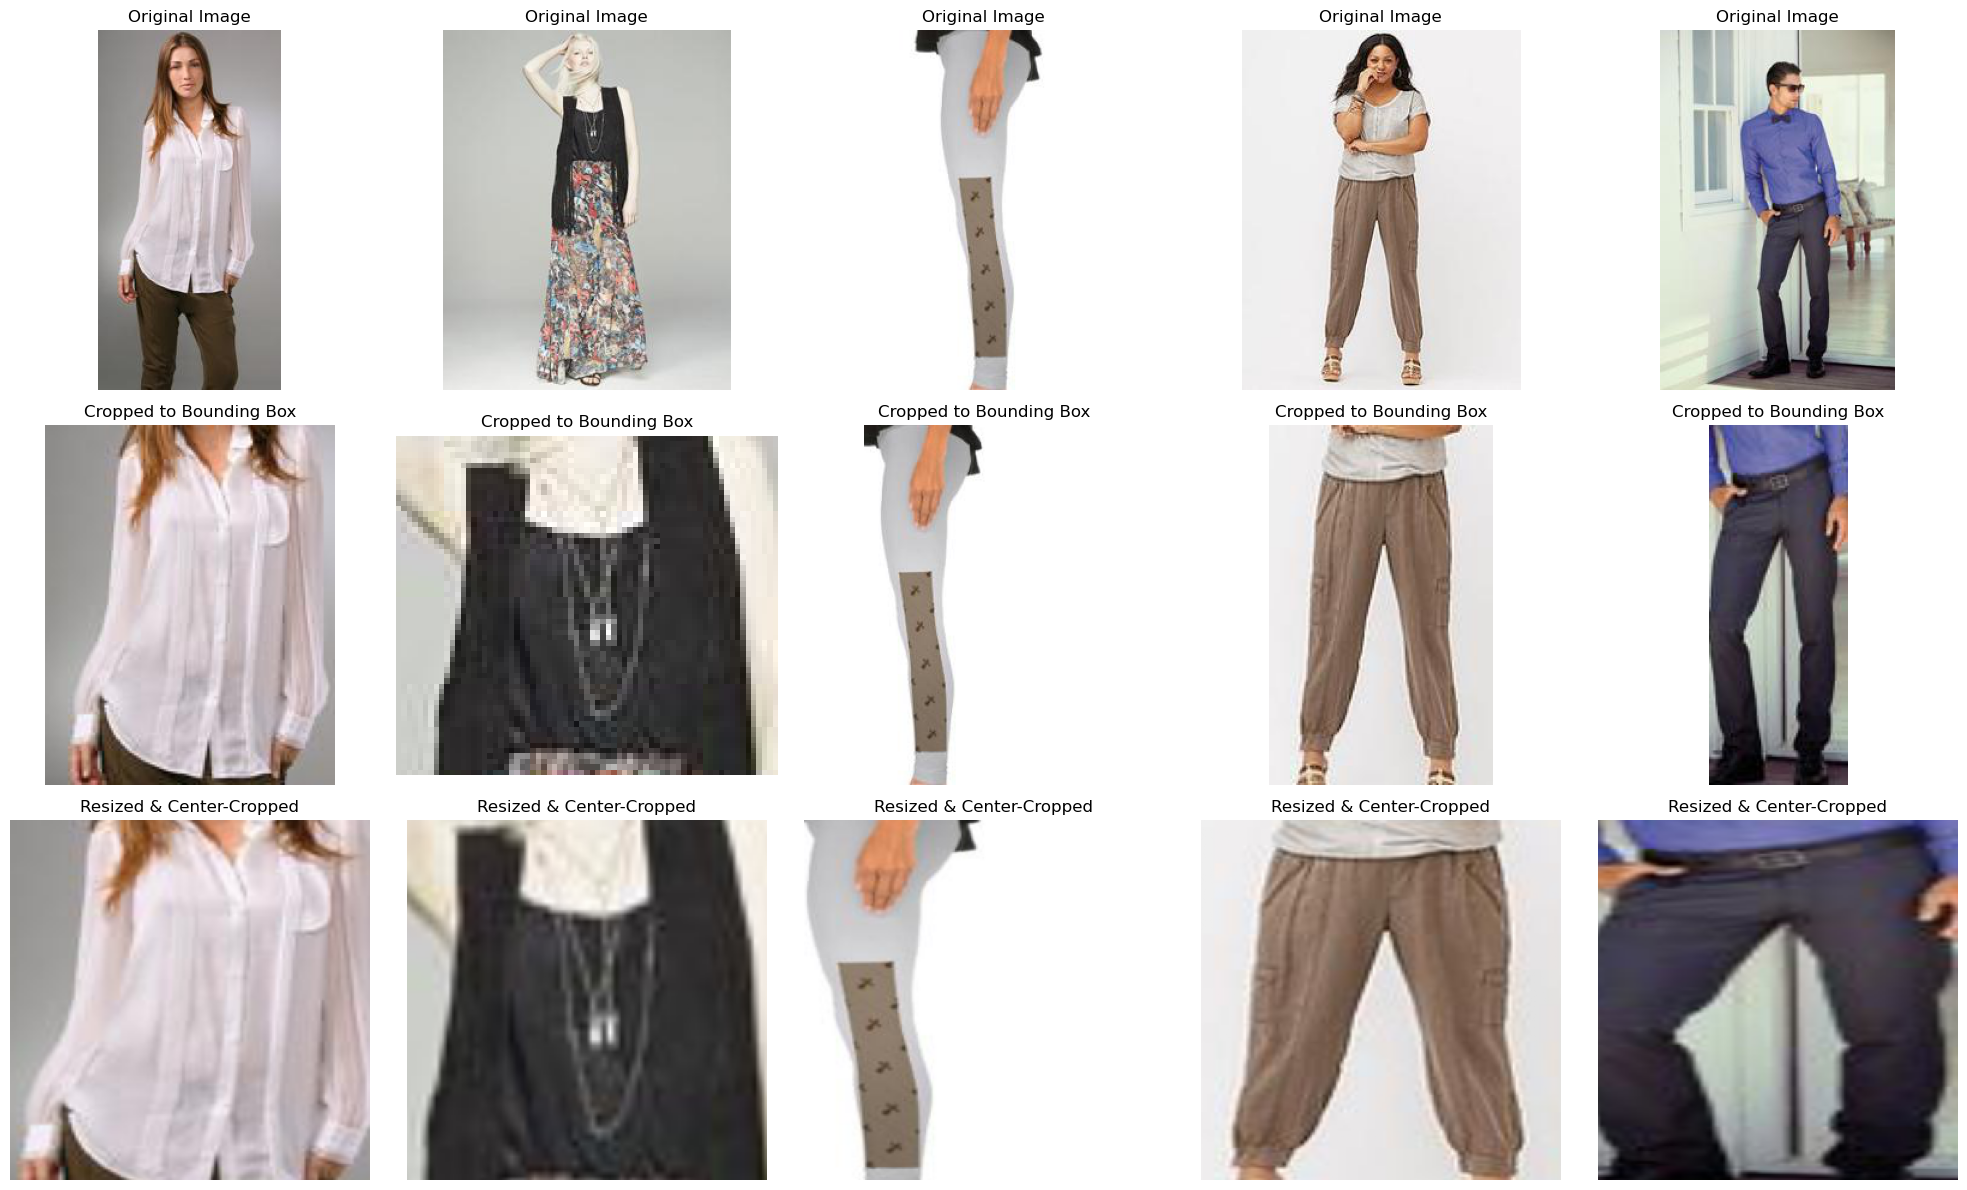

In [16]:
def visualize_preprocessing(fashion_df, num_samples=5):
    """
    Visualize the preprocessing steps for a few sample images
    """
    # Randomly select samples
    samples = fashion_df.sample(num_samples)
    
    fig, axes = plt.subplots(3, num_samples, figsize=(num_samples * 4, 12))
    
    # Define transformation without normalization for visualization
    transform_no_norm = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224),
        transforms.ToTensor()  # No normalization for visualization
    ])
    
    for i, (_, row) in enumerate(samples.iterrows()):
        try:
            # Original image
            img_path = row['absolute_path']
            img = Image.open(img_path).convert('RGB')
            axes[0, i].imshow(img)
            axes[0, i].set_title("Original Image")
            axes[0, i].axis('off')
            
            # Cropped to bounding box
            if all(col in row.index for col in ['x_1', 'y_1', 'x_2', 'y_2']):
                # Ensure bounding box coordinates are valid
                x1, y1 = max(0, row['x_1']), max(0, row['y_1'])
                x2, y2 = min(img.width, row['x_2']), min(img.height, row['y_2'])
                
                # Crop the image to the bounding box
                if x2 > x1 and y2 > y1:
                    cropped_img = img.crop((x1, y1, x2, y2))
                    axes[1, i].imshow(cropped_img)
                    axes[1, i].set_title("Cropped to Bounding Box")
                else:
                    axes[1, i].text(0.5, 0.5, "Invalid bbox", 
                                    ha='center', va='center', 
                                    transform=axes[1, i].transAxes)
            else:
                axes[1, i].text(0.5, 0.5, "No bounding box", 
                                ha='center', va='center', 
                                transform=axes[1, i].transAxes)
            axes[1, i].axis('off')
            
            # Resized and center-cropped
            resized_img = transform_no_norm(cropped_img if 'cropped_img' in locals() else img)
            # Convert tensor to numpy for visualization
            resized_img = resized_img.permute(1, 2, 0).numpy()
            # Clip values to [0, 1] for display
            resized_img = np.clip(resized_img, 0, 1)
            
            axes[2, i].imshow(resized_img)
            axes[2, i].set_title("Resized & Center-Cropped")
            axes[2, i].axis('off')
            
        except (FileNotFoundError, IOError):
            # If image can't be loaded, show placeholders
            for j in range(3):
                axes[j, i].text(0.5, 0.5, "Image not found", 
                                ha='center', va='center', 
                                transform=axes[j, i].transAxes)
                axes[j, i].axis('off')
    
    plt.tight_layout()
    plt.show()

# Visualize preprocessing
visualize_preprocessing(fashion_df)

In [17]:
# get CNN model for feature extraction
model = models.resnet50(pretrained=True)

# remove final classification layer as we just want to perform feature extraction
feature_model = nn.Sequential(*list(model.children())[:-1])
feature_dim = 2048

In [18]:
def extract_features(model, feature_dim, dataloader):
    features = []
    image_paths = []
    category_ids = []
    device = device if torch.cuda.is_available() and device == 'cuda' else 'cpu'
    
    with torch.no_grad():
        for batch in dataloader:
            images = batch['image'].to(device)

            output = model(images)
            batch_features = output.squeeze().cpu().numpy()

            if len(batch_features.shape) == 1:
                batch_features = batch_features.reshape(1,-1)

            features.append(batch_features)
            image_paths.extend(batch['image_path'])
            category_ids.extend(batch['category_id'].numpy())

    features = np.vstack(features)
    return features, image_paths, category_ids

In [19]:
train_df = fashion_df[fashion_df['eval_status'] == 'train']
val_df = fashion_df[fashion_df['eval_status'] == 'val']
test_df = fashion_df[fashion_df['eval_status'] == 'test']

# Create datasets
train_dataset = FashionDataset(train_df, transform=set_transformations('train'))
val_dataset = FashionDataset(val_df, transform=set_transformations('val'))
test_dataset = FashionDataset(test_df, transform=set_transformations('test'))

# Create Data Loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=4)

In [20]:
# Extract features for training set
train_features, train_paths, train_categories = extract_features(model, feature_dim, train_loader)

Traceback (most recent call last):
  File "<string>", line 1, in <module>
  File "/opt/anaconda3/lib/python3.12/multiprocessing/spawn.py", line 122, in spawn_main
    exitcode = _main(fd, parent_sentinel)
               ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.12/multiprocessing/spawn.py", line 132, in _main
    self = reduction.pickle.load(from_parent)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
AttributeError: Can't get attribute 'FashionDataset' on <module '__main__' (<class '_frozen_importlib.BuiltinImporter'>)>


KeyboardInterrupt: 